# Anomalies 

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.model_selection import train_test_split


# ساخت دیتاست ساده برای تست
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y

    def __len__(self):
        return len(self.data)


class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


def train(model, dataloader):
    model.train()
    train_loss = 0

    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()

        x = x.unsqueeze(2)
        x = x.float().to(device)
        y = y.float().to(device)

        output = model(x)
        loss = criterion(output.squeeze(), y)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    return train_loss / len(dataloader)


def test(model, dataloader):
    model.eval()
    test_loss = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for i, (x, y) in enumerate(dataloader):

            x = x.unsqueeze(2)
            x = x.float().to(device)
            y = y.float().to(device)

            output = model(x)
            loss = criterion(output.squeeze(), y)
            test_loss += loss.item()

            y_true.extend(y.cpu().numpy())
            y_pred.extend(output.cpu().numpy())

    return test_loss / len(dataloader), y_true, y_pred


# تعیین دستگاه پردازشی
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# تعیین پارامترهای شبکه
input_size = 1
hidden_size = 64
num_layers = 2
learning_rate = 0.001
num_epochs = 50
batch_size = 16

ساخت دیتاست ساده برای تست


In [ ]:
data = np.random.normal(0, 5, size=(100, 2))
labels = np.zeros((100,))
data.mean()

-0.3283969644974374

افزودن نویز به داده ها

In [ ]:
noise_indices = np.random.choice(100, size=10)
data[noise_indices] = np.random.normal(30, 100, size=(10, 2))
labels[noise_indices] = 1
len(data[noise_indices][data[noise_indices]>data[noise_indices].mean()])

11

تقسیم داده ها به دو بخش آموزشی و تست


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

ایجاد شبکه LSTM


In [ ]:
model = LSTM(input_size, hidden_size, num_layers).to(device)

تعریف تابع هزینه و بهینه ساز


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

آموزش شبکه


Epoch 1, Train Loss: 0.6372, Test Loss: 0.6337
Epoch 2, Train Loss: 0.6143, Test Loss: 0.6113
Epoch 3, Train Loss: 0.5883, Test Loss: 0.5843
Epoch 4, Train Loss: 0.5571, Test Loss: 0.5509
Epoch 5, Train Loss: 0.5188, Test Loss: 0.5080
Epoch 6, Train Loss: 0.4684, Test Loss: 0.4552
Epoch 7, Train Loss: 0.4085, Test Loss: 0.3923
Epoch 8, Train Loss: 0.3420, Test Loss: 0.3243
Epoch 9, Train Loss: 0.2736, Test Loss: 0.2581
Epoch 10, Train Loss: 0.2108, Test Loss: 0.1984
Epoch 11, Train Loss: 0.1604, Test Loss: 0.1491
Epoch 12, Train Loss: 0.1190, Test Loss: 0.1123
Epoch 13, Train Loss: 0.0878, Test Loss: 0.0865
Epoch 14, Train Loss: 0.0658, Test Loss: 0.0686
Epoch 15, Train Loss: 0.0526, Test Loss: 0.0565
Epoch 16, Train Loss: 0.0404, Test Loss: 0.0481
Epoch 17, Train Loss: 0.0331, Test Loss: 0.0414
Epoch 18, Train Loss: 0.0275, Test Loss: 0.0360
Epoch 19, Train Loss: 0.0235, Test Loss: 0.0314
Epoch 20, Train Loss: 0.0201, Test Loss: 0.0277
Epoch 21, Train Loss: 0.0175, Test Loss: 0.0243
E

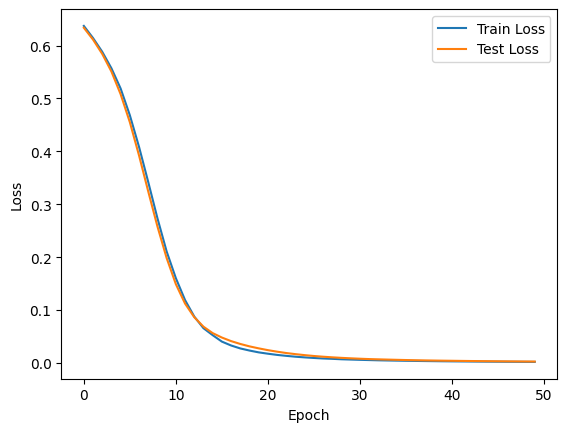

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
test_losses = []
for epoch in range(num_epochs):
    train_loss = train(model, train_loader)
    test_loss,y_true, y_pred = test(model, test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

تشخیص ناهنجاری با استفاده از آخرین لایه خروجی شبکه


In [ ]:
y_pred = np.array(y_pred)
threshold = np.mean(y_pred) + 2 * np.std(y_pred)
anomalies = np.where(y_pred > threshold)[0]

print(f'Anomalies indices: {anomalies}')
print('___________________________')
print(f'All data in test: {len(y_test)}')
print(f'Anomalies count in test : {len(y_test[y_test==1])}')

Anomalies indices: [13 19]
___________________________
All data in test: 20
Anomalies count in test : 2


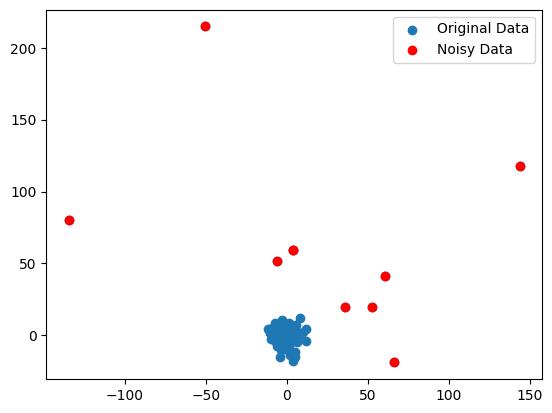

In [ ]:
import matplotlib.pyplot as plt

# scatter plot of original data
plt.scatter(data[:,0], data[:,1], label='Original Data')

# scatter plot of noisy data
plt.scatter(data[noise_indices][:,0], data[noise_indices][:,1], label='Noisy Data', color='r')

plt.legend()
plt.show()
